## 강화학습(Reinforcement Learning)이란?
위키피디아에 따르면 강화학습의 정의는 다음과 같다.
>어떤 환경 안에서 정의된 에이전트가 현재의 상태를 인식하여, 선택 가능한 행동 중 보상을 최대화하는 행동 혹은 행동 순서를 선택하는 방법

강화학습은 **정답이나 잘못된 선택에 대한 정정이 주어지지 않는** 특징이 있다. 그렇기에 MDP(Markov Decision Process)를 정의해 강화학습 문제를 푼다.

### 예시
- [AlphaGo](https://deepmind.com/research/case-studies/alphago-the-story-so-far)
- [AlphaStar](https://deepmind.com/research/publications/AlphaStar-Grandmaster-level-in-StarCraft-II-using-multi-agent-reinforcement-learning)

## MDP(Markov Decision Process)
강화학습 문제를 풀 땐 MDP를 잘 정의하는 게 우선이다. MDP는 다음 구성요소를 가진다.
- 상태 (State)
- 행동 (Action)
- 보상 (Reward)
- 상태 변환 확률 (State Transition Probability)
- 감가율 (Discount Factor)

이제 MDP의 각 요소가 무엇인지 알아보자.

### 상태 (State)
현재 에이전트의 정보이다. 이때 정보는 에이전트가 얻을 수 있는 것의 집합이다.

바둑에선 바둑판이 state가 될 수 있고, 스타크래프트에선 미니맵이나 화면 등이 state가 될 수 있다.

### 행동 (Action)
에이전트가 어떤 상태에서 할 수 있는 행동의 집합이다.

바둑에선 돌을 놓을 수 있는 위치의 집합이 action이 될 수 있다.

### 보상 (Reward)
에이전트가 학습하는데 참고할 수 있는 **유일한** 정보다. 에이전트는 보상을 많이 받는 방향으로 학습해야 한다.

이겼으면 1점, 졌으면 -1점. 혹은 여러 복잡한 방식으로 보상을 정의할 수 있다.

### 상태 변환 확률 (State Transition Probability)
어떤 상태에서 다른 상태로 변하지 못할 수도 있다. 예컨대 미로찾기에서 벽을 뚫을 순 없다. 또한, A에서 B로 변환될 확률보다 A에서 C로 변환될 확률이 높을 수도 있다.
이처럼 상태의 변화엔 확률적인 요인이 들어가는데, 이를 수치적으로 표현한 것이 상태 변환 확률이다.

### 감가율 (Discount Factor)
같은 양의 보상이면 먼 미래에 받는 것보단 바로 받는 게 이득이다. 이를 수학적으로 표현한 것이다.

가령 감가율을 0.9라 하자. 지금 바로 100의 보상을 받는다면 100이지만, 감가율을 적용한다면 2턴 후에 주어지는 100의 보상은 0.9 × 0.9 × 100 = 81로 가치가 줄어든다.

## OpenAI Gym
강화학습엔 환경(environment)이 필요하다. OpenAI Gym는  다양한 강화학습 환경을 제공한다.

이제 OpenAI Gym을 설치해 본격적으로 강화학습을 실습해보자.


In [1]:
# 필요한 패키지를 설치해준다.
!cat requirements.txt
!echo '----------------------------------'
!pip install -r requirements.txt

gym
numpy
matplotlib
----------------------------------


## Frozen Lake
처음으로 실습할 환경은 ***Frozen Lake***다. Frozen Lake는 에이전트가 구멍을 피해 얼어있는 강을 건너는 환경이다.

판의 크기는 4 by 4로 총 16칸이며, 에이전트는 상하좌우로 한 칸 이동할 수 있다.

In [0]:
# 다음 코드를 통해 FrozenLake 환경을 불러올 수 있다.
import gym

env = gym.make("FrozenLake-v0")

In [3]:
# 환경에 관한 정보는 다음과 같이 얻을 수 있다.

print('Observation Space:', env.observation_space)
print('Observation Space Size:', env.observation_space.n)
print('Action Space:', env.action_space)
print('Action Space Size:', env.action_space.n)

env.render()

Observation Space: Discrete(16)
Observation Space Size: 16
Action Space: Discrete(4)
Action Space Size: 4

SFFF
FHFH
FFFH
HFFG


In [4]:
# episode를 시작하기 전엔 reset 메소드를 호출해야한다.
# reset 메소드는 state를 반환한다.
state = env.reset()
print(state)

# step 메소드를 이용해 한 스텝 진행할 수 있다.
# step 메소드는 새로운 state, 보상, 끝났는지 여부, 기타 정보를 반환한다.
next_state, reward, done, _ = env.step(env.action_space.sample())
print('next_state:', next_state)
print('reward:', reward)
print('done:', done)

0
next_state: 0
reward: 0.0
done: False


In [5]:
# 지금까지 배운 내용으로 무작위로 행동하는 에이전트를 만들어보자.

# 환경을 만든다
env = gym.make('FrozenLake-v0')

# Episode를 시작하기 전엔 반드시 reset 메소드를 호출해야한다.
state = env.reset()

while True:
  # 환경을 출력한다.
  env.render()

  # Action space에서 무작위 행동을 가져온다.
  action = env.action_space.sample()

  # 생성한 action을 바탕으로 한 스텝 진행한다.
  new_state, reward, done, _ = env.step(action)

  # Episode가 끝났다면 반복문을 빠져나간다.
  if done:
    print(reward)
    break

  # state에 새로운 state를 할당한다. (지금은 의미 없음)
  state = new_state



SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
0.0


## Q Learning
어떤 상황 *s*에서 어떤 행동 *a*의 가치를 Q(s, a)라 하자. 그렇다면 가장 좋은 행동은 Q(s, a)가 가장 큰 *a*이다.

그렇다면 Q 값은 어떻게 구할까? 보상(reward)를 바탕으로 Q 값을 갱신하면 된다.

In [0]:
import random
import numpy as np
from collections import defaultdict

# Q-Learning를 이용한 에이전트를 만들자.
class Agent:
  def __init__(self, actions):
    # 할 수 있는 행동의 집합
    self.actions = actions

    # 학습률로, 한 번에 얼마나 학습할지 결정한다.
    self.learning_rate = 0.85

    # 감가율
    self.discount_factor = 0.9

    # 무작위로 행동을 선택할 비율이다.
    # 강화학습에선 탐험이 중요하기 때문에 무작위 선택도 넣는다.
    self.epsilon = 0.9

    # Q(s, a)를 담아둔 테이블이다
    self.q_table = defaultdict(lambda: [0. for _ in range(actions.n)])

  # state를 받아 할 행동을 구하는 메소드
  def get_action(self, state):
    if random.random() < self.epsilon:
      # 일정한 확률로 임의의 행동을 한다.
      return self.actions.sample()
    else:
      q_values = self.q_table[state]
      return np.argmax(q_values)

  # 보상을 바탕으로 Q table을 업데이트 하는 메소드
  def train(self, state, action, reward, next_state):
    q1 = self.q_table[state][action]
    q2 = reward + self.discount_factor * max(self.q_table[next_state])

    self.q_table[state][action] += self.learning_rate * (q2 - q1)

In [0]:
# 위에서 만든 에이전트를 바탕으로 학습을 시켜보자.
# 다만, 문제를 조금 쉽게 하기 위해 미끄럼 방지를 켜둔다.
env = gym.make('FrozenLake-v0', is_slippery=False)
agent = Agent(env.action_space)

# 시간에 따른 보상의 변화를 보기 위해 받은 보상을 저장해두자.
rewards = []

# 1000 에피소드를 수행한다.
for episode in range(1, 3000 + 1):
  state = env.reset()

  episode_rewards = []
  while True:
    action = agent.get_action(state)
    next_state, reward, done, _ = env.step(action)

    if done:
      # 만약 죽었다면 음의 보상을 준다.
      if reward == 0:
        reward = -1

      agent.train(state, action, reward, next_state)
      episode_rewards.append(reward)
      break
    else:
      agent.train(state, action, reward, next_state)
      episode_rewards.append(reward)

    state = next_state

  rewards.append(sum(episode_rewards) / len(episode_rewards))

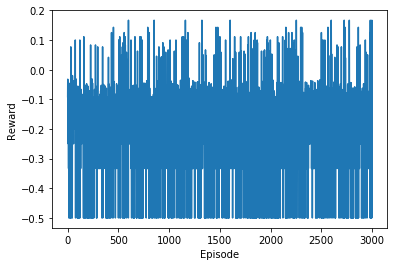

In [8]:
# 이제 그래프를 그려보자
import matplotlib.pyplot as plt
%matplotlib inline

X = [i for i in range(1, 3000 + 1)]

plt.plot(X, rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')

plt.show()

In [9]:
# 에이전트가 정상적으로 학습이 됐는지 확인하기 위해 epsilon을 0으로 하고 에피소드를 수행해보자.
state = env.reset()
agent.epsilon = 0

while True:
  env.render()

  print(agent.q_table[state])

  action = agent.get_action(state)
  next_state, reward, done, _ = env.step(action)

  state = next_state

  if done:
    print('Solved!')
    env.render()
    break


SFFF
FHFH
FFFH
HFFG
[0.5314410000000002, 0.5904900000000002, 0.5904900000000002, 0.5314410000000002]
  (Down)
SFFF
FHFH
FFFH
HFFG
[0.5904900000000002, 0.6561000000000001, -1.0, 0.5314410000000002]
  (Down)
SFFF
FHFH
FFFH
HFFG
[0.6561000000000001, -1.0, 0.7290000000000001, 0.5904900000000002]
  (Right)
SFFF
FHFH
FFFH
HFFG
[0.6561000000000001, 0.81, 0.81, -1.0]
  (Down)
SFFF
FHFH
FFFH
HFFG
[-1.0, 0.81, 0.9, 0.7290000000000001]
  (Right)
SFFF
FHFH
FFFH
HFFG
[0.81, 0.9, 1.0, 0.81]
Solved!
  (Right)
SFFF
FHFH
FFFH
HFFG
